# 🌱 Análisis Supervisado de Deforestación - Departamento del Chocó


Proyecto educativo de inteligencia artificial ambiental


Enfoque: Aprendizaje supervisado con Randow Forest

Este cuaderno ilustra cómo aplicar un modelo supervisado para predecir si  un área presenta alta o baja deforestación, utilizando datos geográficos t temporales del Chocó
link:https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/AREAS-DEFORESTADAS-CHOCO/iczg-dyt3/about_




In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Cargar datos
df = pd.read_csv("/content/drive/MyDrive/proyectoG340IAEjecutor/AREAS_DEFORESTADAS_CHOCO_20251114.csv")
print('Dimensiones del dataset:',df.shape)
df.head()

Dimensiones del dataset: (7937, 10)


,ID,TIPO GEOMETRIA,AÑO,IMAGEN,CAUSA,AREA_Ha,OBSERVACION,LATITUD,LONGITUD,MUNICIPIO
0,7463,Polygon,"2,020",T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.126512,Ninguna,"8° 22' 43,726"" N","77° 14' 19,019"" W",ACANDÍ
1,4659,Polygon,"2,019",T18PTQ_20190527T153621_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.14072,Ninguna,"8° 30' 47,551"" N","77° 19' 30,507"" W",ACANDÍ
2,7459,Polygon,"2,020",T18PTQ_20200112T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.14125,Ninguna,"8° 22' 30,966"" N","77° 13' 49,720"" W",ACANDÍ
3,9719,Polygon,"2,021",T18PTQ_20201202T153619_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.158066,Ninguna,"8° 36' 11.256"" N","77° 20' 50.757"" W",ACANDÍ
4,7464,Polygon,"2,020",T18PTQ_20200201T153611_TCI_10m.jp2 - T18PTQ_20...,Cultivo,0.184549,Ninguna,"8° 22' 22,008"" N","77° 14' 3,921"" W",ACANDÍ


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# tipos de datos de cada columna
df.dtypes

,0
ID,int64
TIPO GEOMETRIA,object
AÑO,object
IMAGEN,object
CAUSA,object
AREA_Ha,object
OBSERVACION,object
LATITUD,object
LONGITUD,object
MUNICIPIO,object


In [ ]:
# resumen más completo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7937 entries, 0 to 7936
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              7937 non-null   int64 
 1   TIPO GEOMETRIA  7937 non-null   object
 2   AÑO             7937 non-null   object
 3   IMAGEN          5901 non-null   object
 4   CAUSA           7718 non-null   object
 5   AREA_Ha         7937 non-null   object
 6   OBSERVACION     7937 non-null   object
 7   LATITUD         7930 non-null   object
 8   LONGITUD        7930 non-null   object
 9   MUNICIPIO       7937 non-null   object
dtypes: int64(1), object(9)
memory usage: 620.2+ KB


In [ ]:
#contar columnas categóricas
# normalmente son tipo object o category
cat_cols =df.select_dtypes(include=['object','category']).columns
num_cat = len(cat_cols)
print("Columnas categóricas:", num_cat)
print("Nombre:",list(cat_cols))


Columnas categóricas: 9
Nombre: ['TIPO GEOMETRIA', 'AÑO', 'IMAGEN', 'CAUSA', 'AREA_Ha', 'OBSERVACION', 'LATITUD', 'LONGITUD', 'MUNICIPIO']


In [ ]:
# columnas neméricas int64 o float64
cont_cols=df.select_dtypes(include=['int64','float64']).columns
num_cont=len(cont_cols)
print("Columnas númericas:", num_cont)
print("Nombre:",list(cont_cols))

Columnas númericas: 1
Nombre: ['ID']


In [ ]:
# total de valores nulos por columna
print(df.isnull().sum())

ID                   0
TIPO GEOMETRIA       0
AÑO                  0
IMAGEN            2036
CAUSA              219
AREA_Ha              0
OBSERVACION          0
LATITUD              7
LONGITUD             7
MUNICIPIO            0
dtype: int64


In [ ]:
#Verificar  tipo de dato de AREA_Ha
print("Tipo de dato original de AREA_Ha",df['AREA_Ha'].dtype)

Tipo de dato original de AREA_Ha object


In [ ]:
# convertir a númenrico
df['AREA_Ha']=pd.to_numeric(df['AREA_Ha'],errors='coerce')
print("Tipo de dato despues de convertir AREA_Ha",df['AREA_Ha'].dtype)

Tipo de dato despues de convertir AREA_Ha float64


In [ ]:
# tipos de datos de cada columna
df.dtypes

,0
ID,int64
TIPO GEOMETRIA,object
AÑO,object
IMAGEN,object
CAUSA,object
AREA_Ha,float64
OBSERVACION,object
LATITUD,object
LONGITUD,object
MUNICIPIO,object


In [ ]:
# Revisar si hubo valores no convertidos
n_no_numericos=df['AREA_Ha'].isna().sum()
print(f"valores no númericos convertidos a NaN:{n_no_numericos}")

valores no númericos convertidos a NaN:9


In [ ]:
#Eliminar filas donde una columna tenga valores nulos
df = df.dropna(subset=['AREA_Ha'])


In [ ]:
n_no_numericos=df['AREA_Ha'].isna().sum()
print(f"valores no númericos convertidos a NaN:{n_no_numericos}")

valores no númericos convertidos a NaN:0


1. Distribución general

Histograma o boxplot de AREA_Ha

Para ver cómo se distribuyen las áreas deforestadas.

Ejemplo:

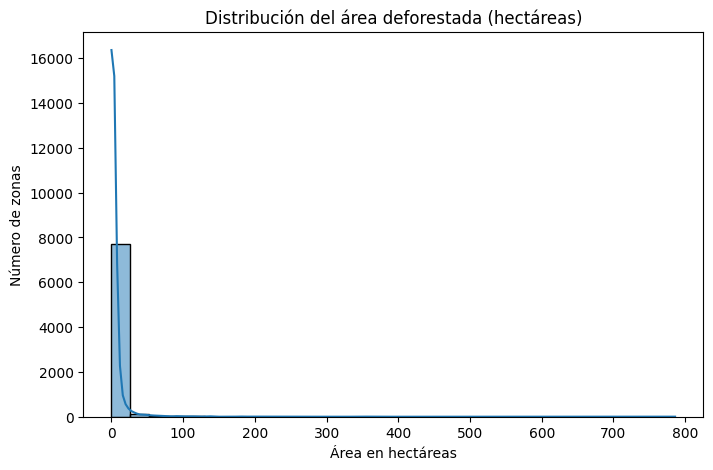

In [ ]:
import seaborn as sns
 # Asegurarse de que el área es numérica
df['AREA_Ha'] = df['AREA_Ha'].astype(float)

# Crear histograma
plt.figure(figsize=(8,5))
sns.histplot(df['AREA_Ha'], bins=30, kde=True)
plt.title("Distribución del área deforestada (hectáreas)")
plt.xlabel("Área en hectáreas")
plt.ylabel("Número de zonas")
plt.show()

Interpretación:

Las barras altas muestran los rangos más comunes de área.

La línea suave (kde=True) muestra la forma general de la distribución.

Boxplot (diagrama de caja)

Un boxplot muestra cómo se agrupan los valores y si hay valores atípicos (outliers).

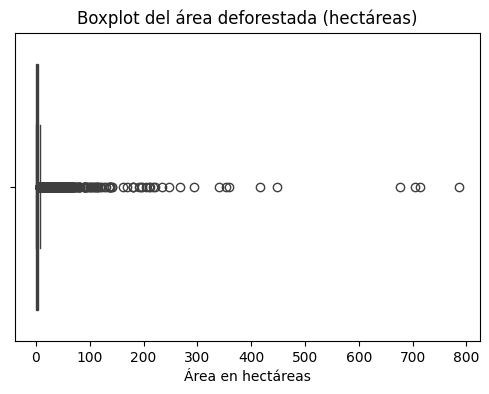

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['AREA_Ha'])
plt.title("Boxplot del área deforestada (hectáreas)")
plt.xlabel("Área en hectáreas")
plt.show()


Interpretación del boxplot:

El rectángulo central muestra el rango donde están la mayoría de los valores.

La línea dentro del rectángulo es la mediana (valor central).

Los puntos alejados son áreas que se salen del promedio (posibles grandes focos de deforestación).

2. Evolución temporal

Gráfico de líneas o barras de deforestación por año

Permite ver cómo ha cambiado la deforestación entre 2015–2022, por ejemplo.

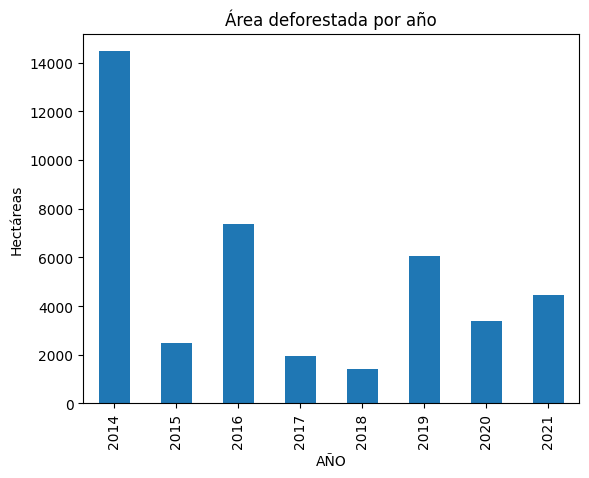

In [ ]:
df['AÑO'] = df['AÑO'].str.replace(',', '').astype(int)
df.groupby('AÑO')['AREA_Ha'].sum().plot(kind='bar')
plt.title("Área deforestada por año")
plt.ylabel("Hectáreas")
plt.show()


3. Causas de deforestación

Gráfico de barras o pastel

Muestra qué causa es más común.

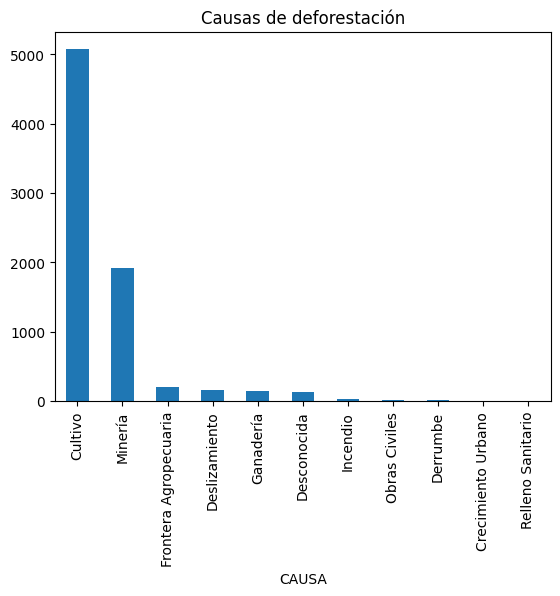

In [ ]:
df['CAUSA'].value_counts().plot(kind='bar')
plt.title("Causas de deforestación")
plt.show()


4. Comparación por municipio

Top 10 municipios con mayor área deforestada

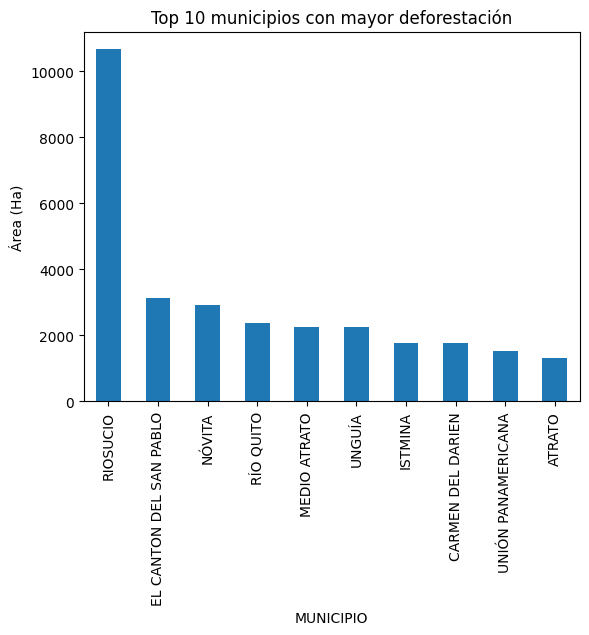

In [ ]:
df.groupby('MUNICIPIO')['AREA_Ha'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 municipios con mayor deforestación")
plt.ylabel("Área (Ha)")
plt.show()


Mapa geográfico

Si conviertes las coordenadas LATITUD y LONGITUD a decimales, puedes usar:

folium o geopandas para un mapa interactivo

In [ ]:
#conviertes las coordenadas LATITUD y LONGITUD a decimales
import re
import numpy as np
import pandas as pd

def dms_a_decimal(coord):
    """
    Convierte coordenadas DMS (tipo '8° 30' 47,551" N' o '77° 14' 19,019" W') a decimal.
    Soporta formatos con comas o puntos decimales.
    Devuelve NaN si el formato no se reconoce.
    """
    if pd.isna(coord):
        return np.nan

    # Limpiar espacios y normalizar comillas
    coord = str(coord).strip().replace("″", '"').replace("’", "'").replace("”", '"')

    # Expresión regular mejorada
    match = re.match(
        r'(\d+)[°\s]+(\d+)?[\'\s]*(\d+[.,]?\d*)?"?\s*([NnSsEeOoWw])',
        coord
    )

    if not match:
        return np.nan

    grados = float(match.group(1))
    minutos = float(match.group(2)) if match.group(2) else 0
    segundos = float(str(match.group(3)).replace(',', '.')) if match.group(3) else 0
    direccion = match.group(4).upper()

    # Conversión a decimal
    decimal = grados + (minutos / 60) + (segundos / 3600)

    # Si es Sur (S), Oeste (O), o West (W), hacer negativo
    if direccion in ['S', 'O', 'W']:
        decimal *= -1

    return decimal

# 🔍 Ejemplo de prueba
ejemplos = [
    "8° 30' 47,551\" N",
    "76° 39' 12,200\" O",
    "77° 14' 19,019\" W",
    "7° 55' 30.000\" S"
]

for e in ejemplos:
    print(f"{e} → {dms_a_decimal(e)}")


8° 30' 47,551" N → 8.51320861111111
76° 39' 12,200" O → -76.6533888888889
77° 14' 19,019" W → -77.23861638888889
7° 55' 30.000" S → -7.925000000000001


In [ ]:

# Aplicar la conversión a todo el DataFrame
df['LAT'] = df['LATITUD'].apply(dms_a_decimal)
df['LON'] = df['LONGITUD'].apply(dms_a_decimal)

# Revisar los primeros valores
df[['LATITUD', 'LAT', 'LONGITUD', 'LON']].head()

import folium
mapa = folium.Map(location=[5.7, -76.8], zoom_start=7)
for _, row in df.head(100).iterrows():
    folium.CircleMarker([row['LAT'], row['LON']], radius=2, color='red').add_to(mapa)
mapa


In [ ]:
import folium

mapa = folium.Map(location=[5.7, -76.8], zoom_start=7)
for _, row in df.dropna(subset=['LAT', 'LON']).head(200).iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=2,
        color='red',
        fill=True
    ).add_to(mapa)

mapa


In [ ]:
mapa = folium.Map(location=[5.7, -76.8], zoom_start=7)
for _, row in df.nlargest(10, 'AREA_Ha').iterrows():
    folium.CircleMarker([row['LAT'], row['LON']], radius=2, color='red').add_to(mapa)
mapa

In [ ]:
df.nlargest(10, 'AREA_Ha')

,ID,TIPO GEOMETRIA,AÑO,IMAGEN,CAUSA,AREA_Ha,OBSERVACION,LATITUD,LONGITUD,MUNICIPIO,LAT,LON
3640,5093,Polygon,2014,NaN,Minería,785.882401,Ninguna,"6° 3' 8,981"" N","76° 35' 41,666"" W",MEDIO ATRATO,6.052495,-76.594907
2665,1478,Polygon,2015,NaN,Desconocida,713.636508,Ninguna,"4° 3' 57,108"" N","76° 51' 36,013"" W",EL LITORAL DEL SAN JUAN,4.065863,-76.860004
6782,2794,Polygon,2016,LC80100552015082LGN00_b1b7.tif - LC80100552016...,Incendio,703.896457,Ninguna,"7° 32' 37,661"" N","76° 57' 42,569"" W",RIOSUCIO,7.543795,-76.961825
6781,2795,Polygon,2016,LC80100552015082LGN00_b1b7.tif - LC80100552016...,Incendio,677.570024,Ninguna,"7° 31' 33,300"" N","76° 56' 10,890"" W",RIOSUCIO,7.525917,-76.936358
6780,2822,Polygon,2016,NaN,Desconocida,448.914747,Ninguna,"7° 31' 1,896"" N","76° 59' 33,220"" W",RIOSUCIO,7.517193,-76.992561
6779,2789,Polygon,2016,LC80100552016293LGN00_B4B6.tif - LC80100552016...,Cultivo,416.754268,Ninguna,"7° 39' 49,901"" N","77° 19' 10,509"" W",RIOSUCIO,7.663861,-77.319586
7936,5902,Polygon,2017,NaN,Minería,358.591495,Ninguna,"5° 17' 5,200"" N","76° 39' 58,644"" W",UNIÓN PANAMERICANA,5.284778,-76.666290
3728,5924,Polygon,2019,T18NUL_20190522T153629_TCI_10m.jp2,Desconocida,353.077640,Ninguna,"5° 3' 28,689"" N","76° 44' 28,254"" W",MEDIO SAN JUAN,5.057969,-76.741182
7787,2945,Polygon,2019,S2B_T18NTP_20190313T153619_TCI_10m.jp2 - S2B_T...,Incendio,339.601808,Ninguna,"7° 58' 14,407"" N","77° 5' 41,917"" W",UNGUÍA,7.970669,-77.094977
2474,5442,Polygon,2014,NaN,Minería,293.995915,Ninguna,"5° 23' 2,944"" N","76° 44' 46,582"" W",EL CANTON DEL SAN PABLO,5.384151,-76.746273


In [ ]:
from sklearn.model_selection import train_test_split

X = X_processed   # Variables procesadas del paso anterior
y = y             # Tu variable objetivo: AREA_Ha_clean

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


NameError: name 'X_processed' is not defined